In [ ]:
# 구글 마운트 후
# 파일위치 지정
%cd /content/drive/MyDrive/LGDXSCHOOL 2기/DeepLearning

/content/drive/MyDrive/LGDXSCHOOL 2기/DeepLearning


### 학습목표
- RNN의 기본 구조에 대해 이해하고 RNN 알고리즘을 활용하여 시계열 데이터 분석을 할 수 있다.
- keras에서 제공하는 SimpleRNN을 사용해보자

### RNN (Recurrent Neural Network) 순환신경망
- 순환하는 신경망으로 앞서 입력받은 데이터의 연산결과를 잠시 기억 -> 다음 연산에 사용하여 학습하는 방법으로 주로 시계열데이터 연산에 사용된다
- 이전 데이터가 다음 데이터에 영향을 주어 학습, 예측

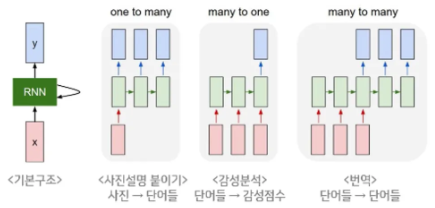

### 알파벳 한 글자 단위로 학습하기
- 5개의 알파벳을 가지는 단어를 학습
- 앞의 4개 알파벳을 학습하여 마지막 1개 알파벳을 예측
- hello, apple, happy, drink, house
<br><br>
- 토큰화: 알파벳 단위
- 수치화: 원핫 인코딩
- 단어사전: 모델이 학습을 위해 사용하는 단어들의 묶음 -> 단어사전이 가지는 데이터가 많을수록 모델의 능력이 올라감
- 단어사전에 넣어줄 알파벳
  - h,e,l,o,a,p,y,d,r,i,n,k,u,s (총 14개 단어)
  - 지금 활용할 알파벳을 단어사전으로 만들어보자!

### 텍스트 데이터 분석을 위한 전처리
#### 토큰화, 수치화
- 토큰화: 문장을 특정 기준에 맞춰 자르는 과정
  1. 글자 단위
  2. 단어 단위
  3. 형태소 단위
    - 의미를 가지는 가장 작은 단위
    - 다양한 형태소 분석기를 활용하여 토큰화(분석데이터에 맞춰 사용)
- 수치화: 잘라진 토큰을 숫자로 변경하는 과정(컴퓨터가 학습할 수 있는 형태로 변경)
  1. 원핫 인코딩, BOW(Back Of Words), TF-IDF(단어의 빈도에 따라서 가중치와 패널티를 부여)
  2. 워드 임베딩 -> 학습을 기반으로 수치화 방법

In [ ]:
import numpy as np

In [ ]:
# 문제 데이터: 단어의 앞 4개 알파벳 (hell, appl, happ, drin, hous)
words = ['hell', 'appl', 'happ', 'drin', 'hous']
# 정답 데이터: 단어의 마지막 1개 알파벳 (o, e, y, k, e)
y = np.array(['o', 'e', 'y', 'k', 'e'])
# 알파벳을 수치화하는 작업을 진행 -> 단어사전 구축
for i in range(len(words)):
  words[i] = list(words[i])
X = np.array(words)
X

array([['h', 'e', 'l', 'l'],
       ['a', 'p', 'p', 'l'],
       ['h', 'a', 'p', 'p'],
       ['d', 'r', 'i', 'n'],
       ['h', 'o', 'u', 's']], dtype='<U1')

In [ ]:
X = np.array([
    [[1,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0]],
    [[0,0,0,0,1,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0]],
    [[1,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0]],
    [[0,0,0,0,0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,1,0,0,0]],
    [[1,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,1]]
])

X

array([[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]],

       [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    

In [ ]:
# [[o,e,y,k,e]]
y = np.array([[0,0,0,1,0,0,0,0,0,0,0,0,0,0],
              [0,1,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,1,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,1,0,0],
              [0,1,0,0,0,0,0,0,0,0,0,0,0,0]])
y

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

- 5번째 단어인 'e'를 출력하기까지 4번의 순환을 가진다

In [ ]:
# 크기 확인
X.shape, y.shape
# X.shape(샘플수, 순환횟수, 특성개수) -> 특성개수: 14개의 단어사전에서 1개

((5, 4, 14), (5, 14))

- 5개 마지막 알파벳 예측
- 앞 4글자 학습하므로
- 총 단어사전에서 14개 알파벳에서 1개를 예측
  - h, e, l, o, a, p, y, d, r, i, n, k, u, s (총 14개 단어)

In [ ]:
# RNN 학습을 위한 데이터 이해 (shape)
# 시계열 데이터 -> 지난 6개월의 전기요금을 학습하여 이번달 전기 요금을 예측 (7,8,9월 -> 3개월을 예측하시오)
# X_shape는?
# (3,6,1)
# 3-> 예측할 7,8,9월
# 6-> 1~6월
# 1-> 이번달 전기요금 1개

### RNN 모델링

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, SimpleRNN
# SimpleRNN : 기본적인 RNN구조를 구현한 클래스

In [ ]:
# 모델 설계
rnn_model = Sequential()
rnn_model.add(InputLayer(shape=(4,14))) # 샘플수를 제외한 형태 (순환횟수, 특성수)
rnn_model.add(SimpleRNN(units = 16))

rnn_model.add(Dense(units=14, activation='softmax'))

In [ ]:
rnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 14)                  │             238 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 734 (2.87 KB)

 Trainable params: 734 (2.87 KB)

 Non-trainable params: 0 (0.00 B)

- 496개의 가중치를 가짐

In [ ]:
# 파라미터 개수 확인
# units = 1 -> 16개 Param
# 14개 가중치 + 절편 1개 + 기억가중치 1개 = 16개

# units = 2
# 14개 가중치 + 절편 1개 + 기억가중치 1개 + 옆친구 기억가중치 1개 = 17개 * = 34개

# RNN 모델은 기억가중치를 학습에 사용하기 때문에 시계열 데이터 학습이 가능하며
# 유닛이 증가하면 다른 유닛의 기억가중치도 함께 학습한다!

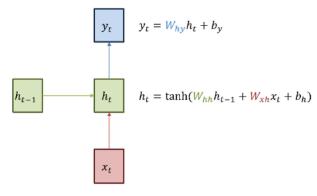

In [ ]:
# 학습방법 평가방법 설정
rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_model.fit(X,y,epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 2.6900
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0000e+00 - loss: 2.6663
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0000e+00 - loss: 2.6427
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0000e+00 - loss: 2.6191
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0000e+00 - loss: 2.5958
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0000e+00 - loss: 2.5725
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.0000e+00 - loss: 2.5494
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.0000e+00 - loss: 2.5264
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.0000e+00 - loss: 2.5035
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.0000e+00 - loss: 2.4808
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.0000e+00 - loss: 2.4582
Epoch 12/1000
1/1 ━━

In [19]:
# 예측해보기
X[0].X_shape는
# 예측을 위해 입력데이터 형태를 일치
# (샘플수, 순환횟수, 특성수)

(4, 14)

In [20]:
test=X[0].reshape(1,4,14)
test.shape

(1, 4, 14)

In [22]:
rnn_model.predict(test)
# 14개의 값이 출력됨

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[3.1094375e-04, 2.5210946e-03, 4.1515430e-04, 9.9202079e-01,
        4.3053992e-04, 1.4955229e-04, 1.1676115e-03, 6.2594336e-04,
        1.5807879e-04, 7.7287573e-04, 3.7760288e-04, 5.2665325e-04,
        1.7183200e-04, 3.5141237e-04]], dtype=float32)

In [21]:
rnn_model.predict(test).argmax()  #-> 3번 인덱스 -> 'o' / arg 요소들 중에서 max 최대값 가져와
# argmax() : 출력된 확률의 최대값인 인덱스 번호 출력
# h, e, l, o, a, p, y, d, r, i, n, k, u, s (총 14개 단어)
# 0.99 확률로 'o'라고 예측함

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


3